In [4]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [7]:
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

In [11]:
x_train.shape

(60000, 28, 28)

In [31]:
x_train[0].shape

(28, 28)

In [15]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

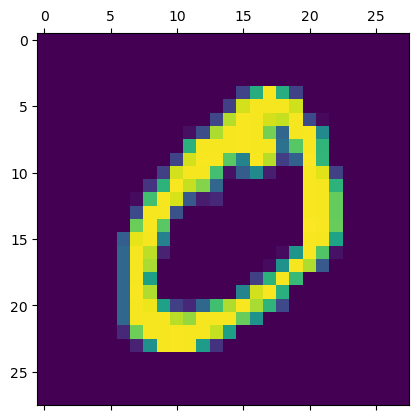

In [19]:
#scaling to lime the range from 0 to 1
x_train=x_train /255
x_test=x_test/255
plt.matshow(x_train[1])

In [23]:
# Flattening into 1-D
x_train_flattened = x_train.reshape(len(x_train), 28 * 28)
x_test_flattened = x_test.reshape(len(x_test), 28 * 28)

In [25]:

# Define the model
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')  # One hidden layer
])

# Compile the model
model.compile(
    optimizer='adam',  # NOT 'admin' — should be 'adam'
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(x_train_flattened, y_train, epochs=5)



C:\Users\Karthick\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.4447 - loss: 2.2444
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7013 - loss: 2.0265
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7350 - loss: 1.8352
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7559 - loss: 1.6658
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7715 - loss: 1.5196


In [27]:
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7743 - loss: 1.4585


[1.4047188758850098, 0.8027999997138977]

In [29]:

# Define the model
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),   # Hidden layer
    keras.layers.Dense(10, activation='softmax')                      # Output layer
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(x_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.5163 - loss: 1.7226
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8505 - loss: 0.5824
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8872 - loss: 0.4196
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8983 - loss: 0.3643
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9062 - loss: 0.3315


In [40]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9686 - loss: 0.1054


[0.0885327160358429, 0.9735000133514404]

In [44]:
y_predicted = model.predict(x_test_flattened)
y_predicted[100]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([2.4521805e-04, 1.3910696e-05, 2.5434015e-04, 1.5682925e-06,
       8.3617160e-05, 3.1340425e-04, 9.9899083e-01, 8.9120767e-05,
       6.0017974e-06, 1.8551133e-06], dtype=float32)

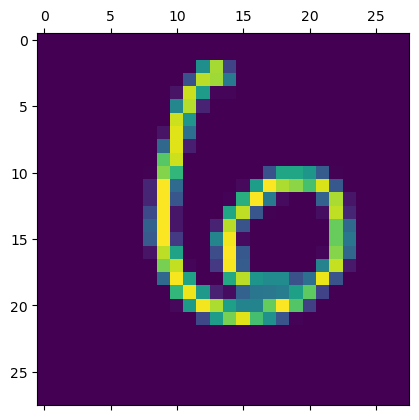

In [46]:
plt.matshow(x_test[100])

In [50]:
np.argmax(y_predicted[100])

6

In [21]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),  # one hidden layer
    keras.layers.Dense(10, activation='sigmoid')  # output layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train with mini-batch size of 32
model.fit(X_train_flattened, y_train, epochs=5, batch_size=32)

SyntaxError: invalid non-printable character U+00A0 (537506197.py, line 13)